In [1]:
import keras,os
from keras.applications.mobilenet import MobileNet
from tensorflow.keras.models import Sequential , load_model , Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout, GlobalAveragePooling2D 
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
import cv2
from sklearn.datasets import load_files
from keras.utils import np_utils
from tensorflow.keras import applications
from tensorflow.keras import optimizers


Using TensorFlow backend.
D:\PHYTON\ANACONDA\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\PHYTON\ANACONDA\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\PHYTON\ANACONDA\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\PHYTON\ANACONDA\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Pas

In [2]:
data_dir = r'D:\_MASAÜSTÜ\2020 _BAHAR\Deep learning\DATA_299x299'

image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)    



train_data_dir = image_generator.flow_from_directory(batch_size=32,
                                                 directory=data_dir,
                                                 shuffle=True,
                                                 target_size=(224, 224), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dir = image_generator.flow_from_directory(batch_size=32,
                                                 directory=data_dir,
                                                 shuffle=True,
                                                 target_size=(224, 224), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 414 images belonging to 5 classes.
Found 102 images belonging to 5 classes.


In [3]:
base_model = applications.mobilenet.MobileNet(weights= None, include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(5, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

In [5]:

checkpoint = tf.keras.callbacks.ModelCheckpoint('MobileNet_Model.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=False,
                             period=1,
                             verbose=1)

In [6]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )


In [7]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

In [8]:
callbacks = [checkpoint]

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

epochs = 50
batch_size = 32

In [9]:
history = model.fit_generator(
    train_data_dir,
    steps_per_epoch = train_data_dir.samples // batch_size,
    validation_data = validation_dir, 
    validation_steps = validation_dir.samples // batch_size,
    epochs = epochs,
    #callbacks=callbacks
    )

model.save('MobileNet_Model.h5')

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
13/13 [==============================] - 201s 15s/step - loss: 1.3210 - acc: 0.5000 - val_loss: 1.5807 - val_acc: 0.1765
Epoch 2/50
13/13 [==============================] - 189s 15s/step - loss: 0.8538 - acc: 0.7391 - val_loss: 1.6240 - val_acc: 0.1765
Epoch 3/50
13/13 [==============================] - 192s 15s/step - loss: 0.7141 - acc: 0.7391 - val_loss: 1.7154 - val_acc: 0.1765
Epoch 4/50
13/13 [==============================] - 192s 15s/step - loss: 0.7756 - acc: 0.7391 - val_loss: 1.8053 - val_acc: 0.1765
Epoch 5/50
13/13 [==============================] - 191s 15s/step - loss: 0.6713 - acc: 0.7729 - val_loss: 1.8772 - val_acc: 0.1765
Epoch 6/50
13/13 [==============================] - 190s 15s/step - loss: 0.6494 - acc: 0.7681 - val_loss: 2.0986 - val_acc: 0.1765
Epoch 7/50
13/13 [==============================] - 191s 15s/step - loss: 0.5898 - acc: 0.7729 - val_loss: 2.1534 - val_acc: 0.1765
Epoch 8/50
13/13 [==========

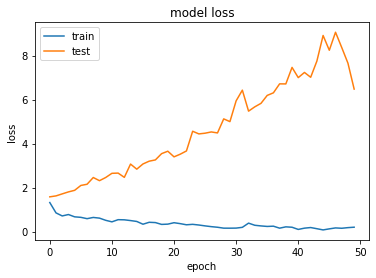

In [22]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [1]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined